In [1]:
# !brew install graphviz
# !pip3 install sdv

In [1]:
import pandas as pd
from sdv.metadata import Metadata
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.datasets.demo import download_demo
from sdv.evaluation.single_table import run_diagnostic
# from sdv.constraints import FixedInSet

In [2]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

In [3]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


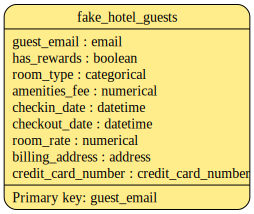

In [4]:
metadata.visualize()

In [5]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)

In [6]:
synthetic_data = synthesizer.sample(num_rows=50)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.34,26 Mar 2020,11 Apr 2020,119.53,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,False,DELUXE,NaN,02 Jul 2020,14 Sep 2020,174.70,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,False,BASIC,22.08,30 Mar 2020,17 Mar 2020,148.34,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788
3,humphreyjennifer@example.net,False,BASIC,8.18,03 May 2020,22 May 2020,177.51,"8906 Bobby Trail\nEast Sandra, NY 43986",3524946844839485
4,joshuabrown@example.net,False,SUITE,7.69,13 Jan 2020,10 Jan 2020,187.93,"732 Dennis Lane\nPort Nicholasstad, DE 49786",4446905799576890978


In [11]:
'''All primary keys must be unique
Continuous values must adhere to the min/max of the real data
Discrete columns (non-PII) must have the same categories as the real data'''

'All primary keys must be unique\nContinuous values must adhere to the min/max of the real data\nDiscrete columns (non-PII) must have the same categories as the real data'

In [7]:
diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████████| 9/9 [00:00<00:00, 1086.92it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████| 1/1 [00:00<00:00, 235.69it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [8]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |███████████████| 9/9 [00:00<00:00, 720.81it/s]|
Column Shapes Score: 85.81%

(2/2) Evaluating Column Pair Trends: |████████| 36/36 [00:00<00:00, 771.76it/s]|
Column Pair Trends Score: 78.26%

Overall Score (Average): 82.04%



In [9]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.966000
1,room_type,TVComplement,0.948000
2,amenities_fee,KSComplement,0.665690
3,checkin_date,KSComplement,0.908000
4,checkout_date,KSComplement,0.941123
5,room_rate,KSComplement,0.720000


In [10]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_rate',
    metadata=metadata
)

fig.show()

In [11]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [12]:
synthetic_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,dsullivan@example.net,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788


In [13]:
from sdv.metadata import SingleTableMetadata

In [14]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)
